In [1]:
# Imports needed for this exercice 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import hcipy as hc # get at  https://docs.hcipy.org/0.4.0/
# You might need those later on in the class
# import os
# import exoscene.image
# import exoscene.star
# import exoscene.planet
# from exoscene.planet import Planet
# import astropy.units as u

For the sake of this exercise let's define the 2D Fourier transfrom as transforming a function f(x,y) into F(u,v)

\begin{equation}
F(\xi,\eta) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} f(x,y) e^{\left[i(x \xi +y \eta )\right]} dx dy 
\end{equation}

When we use the FT for optics purposes it is often more convenient to use the following definition: 

\begin{equation}
F(u,v) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} f(x,y) e^{\left[i 2 \pi (x u +y u )\right]} dx dy 
\end{equation}

where we have simply replace the variables $ (\xi,\eta) = 2 \pi (u,v)$. We also assume for now that the spatial extent of $f(x,y)$  is finite on a unit square, that is $x \in [-1/2,1/2]$. When the bounding area (or volume for higher dimensional FTs) is not unitary (say $\tilde{x} \in [-D/2,D/2]$) then we can also use the definition above after the simple change of variables $x = \tilde{x}/D$. 


We call "units of angular resolution" each unit increment in fourier space (eg in u and v)


The "physics" reasons for doing this will be detailed in Lecture 3.  For now let's just roll with these definitions.

Note: Whether the forward transform has a $+i$ and the reverse transform a $-i$ or vice versa does not make a difference, but you have to use the same convention in the entire calculation/theory.  Anand uses the opposite of this,  $-i$ for forward transforms.



# How to make a circular aperture in hcipy?

These are defined as abstract objects with a center and a radius. We need to:

1) Decide on the number of points (numerical sampling) we call it Npup

2) Define the abstract object (we use  aperture.circular_aperture)

3) Define the grid (we use field.make_pupil_grid)

4) Evaluate the object on the grid

5) Display the array a figure (we use imshow_field). Note that all HCIPy fields are collapsed oin one dimesion. We could also reshape them into a 2D array and use the native imshow of matplotlib. 

number of pixels in aperture array = 100
diameter of the physical array = 1


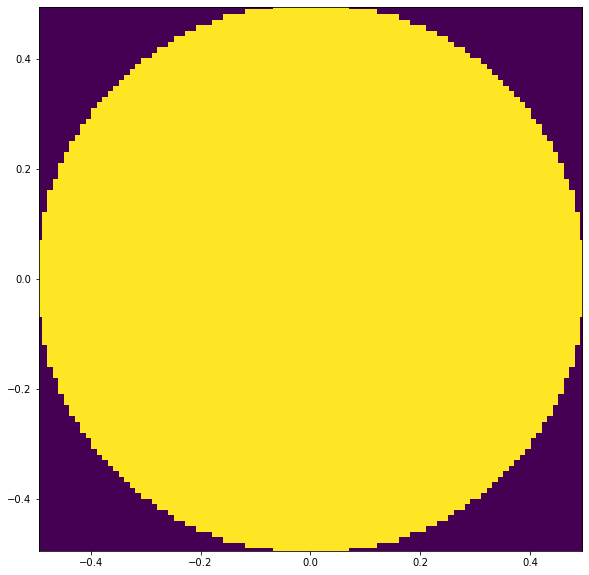

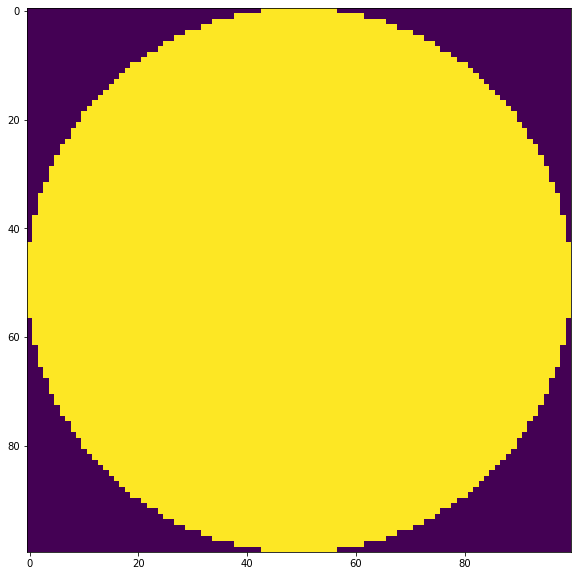

In [40]:
Npup = 100
print('number of pixels in aperture array = ' + str(Npup))
Diam = 1
print('diameter of the physical array = ' + str(Diam))
circular_aperture_object =  hc.aperture.circular_aperture(1., center=None)
pupil_grid = hc.field.make_pupil_grid(Npup, diameter=1.)
circular_aperture_field = circular_aperture_object(pupil_grid)
fig = plt.figure(figsize = [10,10])
hc.imshow_field(circular_aperture_field)
circular_aperture_field_square_array = np.reshape(circular_aperture_field,[Npup, Npup])
fig = plt.figure(figsize = [10,10])
plt.imshow(circular_aperture_field_square_array)

# Take the fourier transform of this aperture with MFT 

Fourier transforms are defined as abstract methods. We first define their parameters and the use them on our freshly define array. Here is out to do this: 

1) define q, nunber of pixels per units of angular resolution

2) define number of elements of angular resolution num_airy 

3) define focal plane grid (hint use field.make_focal_grid and ignore all arguments after num_airy). Note that this function is defined in $(\xi,\eta)$ so we will need to multiply coordinates  $2 \pi$

4) define the matrix fourier transform operator (we use fourier.MatrixFourierTransform)

5) take the fourier transform of the aperture (we use the .forward method)

6) calculate the amplitude of the image of aperture 

7) calculate the intensity of the image of aperture (amplitude square of complex number, numpy can do that for you)

number of pixels per unit of angular resolution = 2
physical size of the image in units of angular resolution  = 10
physical size of the image in units of spatial frequency   = 62.83185307179586
predicted size of the array containing the FT  = 40
actual size of the array containing the FT  = 251.0


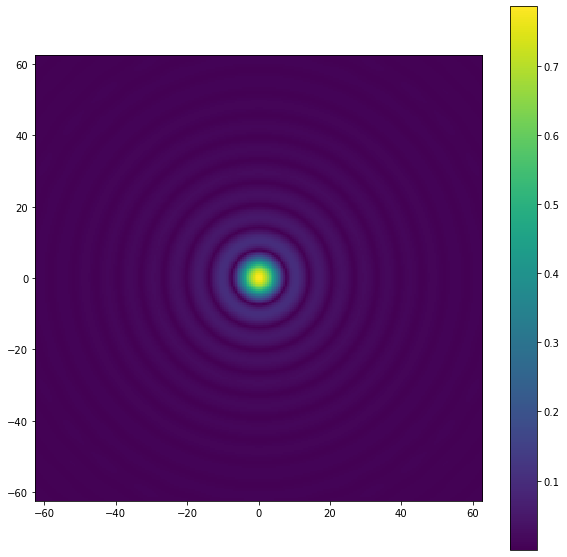

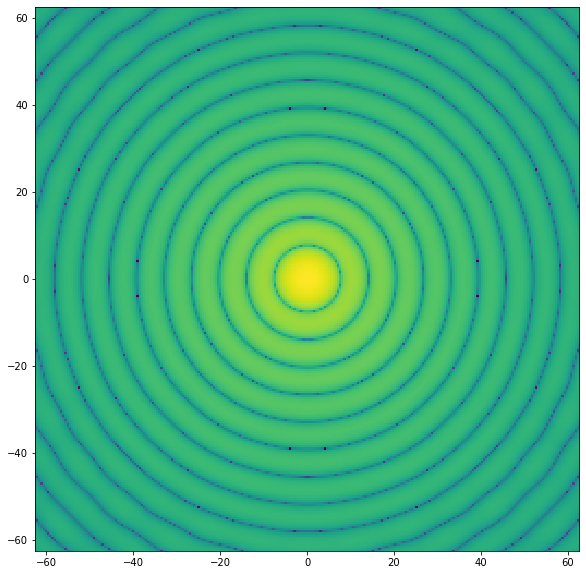

In [41]:
q = 2
print('number of pixels per unit of angular resolution = ' + str(q))
num_airy = 10
num_airy_two_pi = 2*np.pi*num_airy
print('physical size of the image in units of angular resolution  = ' + str(num_airy))
print('physical size of the image in units of spatial frequency   = ' + str(num_airy_two_pi))
focal_grid = hc.field.make_focal_grid(q, num_airy_two_pi)
print('predicted size of the array containing the FT  = ' + str(2*num_airy*q))
MFT = hc.fourier.MatrixFourierTransform(pupil_grid,focal_grid, precompute_matrices=None, allocate_intermediate=None)
fourier_transform_with_MFT = MFT.forward(circular_aperture_field)
intensity  = np.abs(fourier_transform_with_MFT)**2
print('actual size of the array containing the FT  = ' + str(np.sqrt(intensity.shape[0])))
fig = plt.figure(figsize = [10,10])
hc.imshow_field(np.sqrt(intensity))
plt.colorbar()
fig = plt.figure(figsize = [10,10])
hc.imshow_field(np.log10(intensity))

7) compare the summed intensities of the input aperture and of the image. What do you notice? Is energy conserved?

In [42]:
np.sum(intensity)

Field(121.87733007)

In [43]:
np.sum(circular_aperture_field**2)

Field(7860.)

8) The energy is not conserved. Change the parameters (q,Npup and num_airy) and see how the ratio of the intensities changes. What is happenning is that by "summing" over the array we forgot to mutiply by $dx$ and $du$. 

### Q1 Try to fix code so the sum of the intensities is equal. You can either derive $dx$ and $du$ based on (q,Npup and num_airy) or read directly in focal_grid.coords.delta and pupil_grid.coords.delta

# Explore the fourier transform of this aperture with MFT 

1) Right now everything is the fourier plane is in units of angular resolution. If interrested play with the , spatial_resolution, pupil_diameter, focal_length, f_number, reference_wavelength to see how images scale. This will make a lot more sense after lecture 3. 

number of pixels per unit of angular resolution = 20
physical size of the image in units of angular resolution  = 10
physical size of the image in units of spatial frequency   = 62.83185307179586
predicted size of the array containing the FT  = 400
actual size of the array containing the FT  = 2513.0


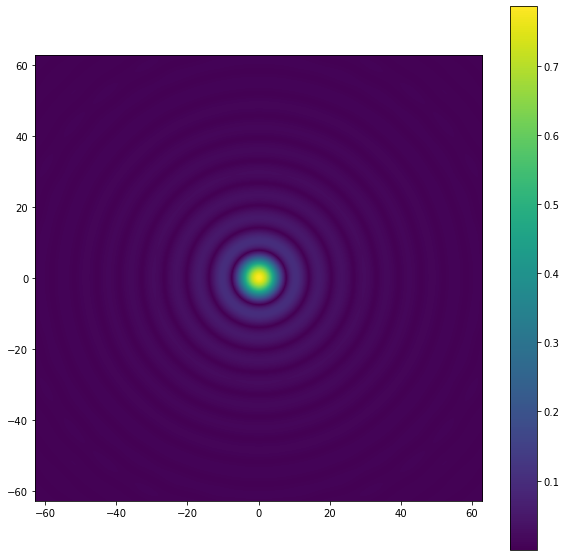

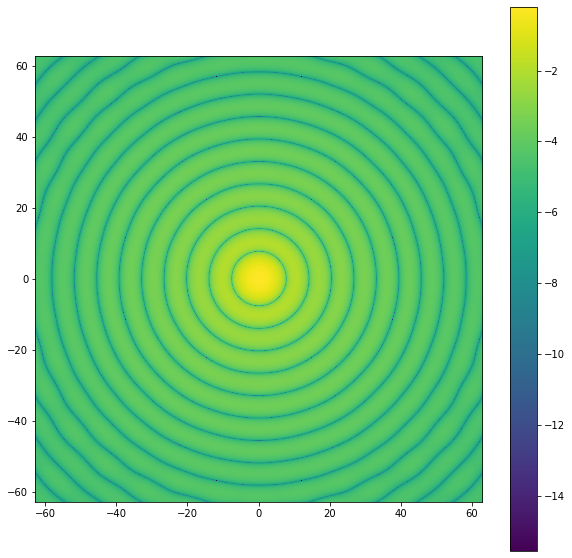

In [45]:
q = 20
print('number of pixels per unit of angular resolution = ' + str(q))
num_airy = 10
num_airy_two_pi = 2*np.pi*num_airy
print('physical size of the image in units of angular resolution  = ' + str(num_airy))
print('physical size of the image in units of spatial frequency   = ' + str(num_airy_two_pi))
focal_grid = hc.field.make_focal_grid(q, num_airy_two_pi)
print('predicted size of the array containing the FT  = ' + str(2*num_airy*q))
MFT = hc.fourier.MatrixFourierTransform(pupil_grid,focal_grid, precompute_matrices=None, allocate_intermediate=None)
fourier_transform_with_MFT = MFT.forward(circular_aperture_field)
intensity  = np.abs(fourier_transform_with_MFT)**2
print('actual size of the array containing the FT  = ' + str(np.sqrt(intensity.shape[0])))
fig = plt.figure(figsize = [10,10])
hc.imshow_field(np.sqrt(intensity))
plt.colorbar()
fig = plt.figure(figsize = [10,10])
hc.imshow_field(np.log10(intensity))
plt.colorbar()

# Take the fourier transform of this aperture with FFT 

Similar steps as before:

1) define q, nunber of pixels per units of angular resolution (now this is done via zero padding, we will discuss that in class if you are not familiar with it  )

2) define the matrix fourier transform operator (we use fourier.MatrixFourierTransform)

3) take the fourier transform of the aperture (we use the .forward method)

4) calculate the amplitude of the image of aperture 

5) calculate the intensity of the image of aperture (amplitude square of complex number, numpy can do that for you)

6) compare the summed intensities of the input aperture and of the image. What do you notice? Is energy conserved?

7) fix the summed intensities to make sure that energy is conserved (hint use focal_grid.coords.delta). Note that there is a factor of 2 pi missing in in front of the DFT so you will need to fix this. 


number of pixels per unit of angular resolution = 4.0
predicted size of the array containing the FT  = 400.0
actual size of the array containing the FT  = 400.0


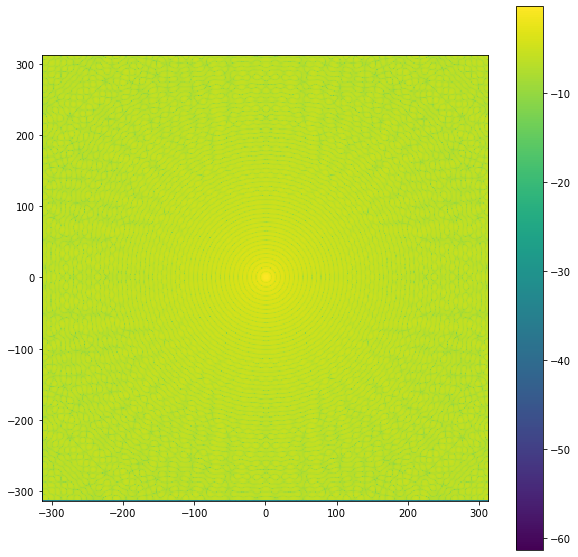

In [46]:
q0 = 4.
print('number of pixels per unit of angular resolution = ' + str(q0))
FFT = hc.fourier.FastFourierTransform(pupil_grid, q=q0, fov=1, shift=0, emulate_fftshifts=None)
fourier_transform_with_FFT = FFT.forward(circular_aperture_field)
print('predicted size of the array containing the FT  = ' + str(q0*np.sqrt(pupil_grid.x.shape[0])))
intensity  = np.abs(fourier_transform_with_FFT)**2
print('actual size of the array containing the FT  = ' + str(np.sqrt(intensity.shape[0])))
fig = plt.figure(figsize = [10,10])
hc.imshow_field(np.log10(intensity))
plt.colorbar()

### Q2: Same exercise as before: fix  the energy ratio so it is as close to one as possible. Except that this time the samplings are different 

#  A few example to explore now that you know the basics. 

### Q3: Answer one as part  of your homework (you can have a crack at all of them if you want)

1) Try the FFT with the pathological q = 2. What is going on here?

2) Figure out the value of num_airy so that the result from the MFT is the same as the result from the FFT (or at least close enough). Try to explain what is happenning. 

3) Try to apply the forward and backward methods to see what happens. What are differences between FFT and MFT? Try to explain what is happenning.

4) Explore what zero padding actuattly does with both MFT and FFT by defining the aperture as circular_aperture_object =  hc.aperture.circular_aperture(0.5, center=None) [or whatever nuber <1 you d like]. Try to explain what is happenning. 